In [25]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Neural Network Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('C:/Users/PRAMOD/Desktop/Defect/casting_data/train',
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('C:/Users/PRAMOD/Desktop/Defect/casting_data/test',
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [31]:
model = tf.keras.models.Sequential()
#convolution+pooling
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
#second layer
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


#creating nueral network 
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                                  
                               

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
830/830 [==============================] - 308s 348ms/step - loss: 0.5563 - accuracy: 0.6964 - val_loss: 0.7057 - val_accuracy: 0.6545
Epoch 2/10
830/830 [==============================] - 71s 86ms/step - loss: 0.3752 - accuracy: 0.8322 - val_loss: 0.7610 - val_accuracy: 0.6280
Epoch 3/10
830/830 [==============================] - 42s 51ms/step - loss: 0.3090 - accuracy: 0.8625 - val_loss: 0.2675 - val_accuracy: 0.8769
Epoch 4/10
830/830 [==============================] - 43s 52ms/step - loss: 0.2452 - accuracy: 0.8910 - val_loss: 0.2667 - val_accuracy: 0.8881
Epoch 5/10
830/830 [==============================] - 49s 59ms/step - loss: 0.2035 - accuracy: 0.9159 - val_loss: 0.4396 - val_accuracy: 0.8350
Epoch 6/10
830/830 [==============================] - 48s 58ms/step - loss: 0.1662 - accuracy: 0.9367 - val_loss: 0.2098 - val_accuracy: 0.9063
Epoch 7/10
830/830 [==============================] - 47s 57ms/step - loss: 0.1295 - accuracy: 0.9496 - val_loss: 0.1905 - val_accurac

In [37]:
 model.save('best_model.h5')

#             #Prediction  on Single image

In [45]:
from keras.preprocessing import image
test_image = image.load_img('C:/Users/PRAMOD/Desktop/Defect/casting_data/test/def_front/cast_def_0_218.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [46]:
result

array([[0.01914188]], dtype=float32)

In [47]:
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

Defective


In [48]:
import cv2
img = cv2.imread('C:/Users/PRAMOD/Desktop/Defect/casting_data/test/def_front/cast_def_0_218.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

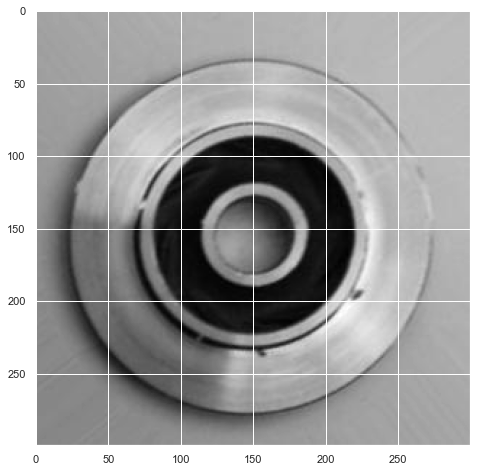

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show